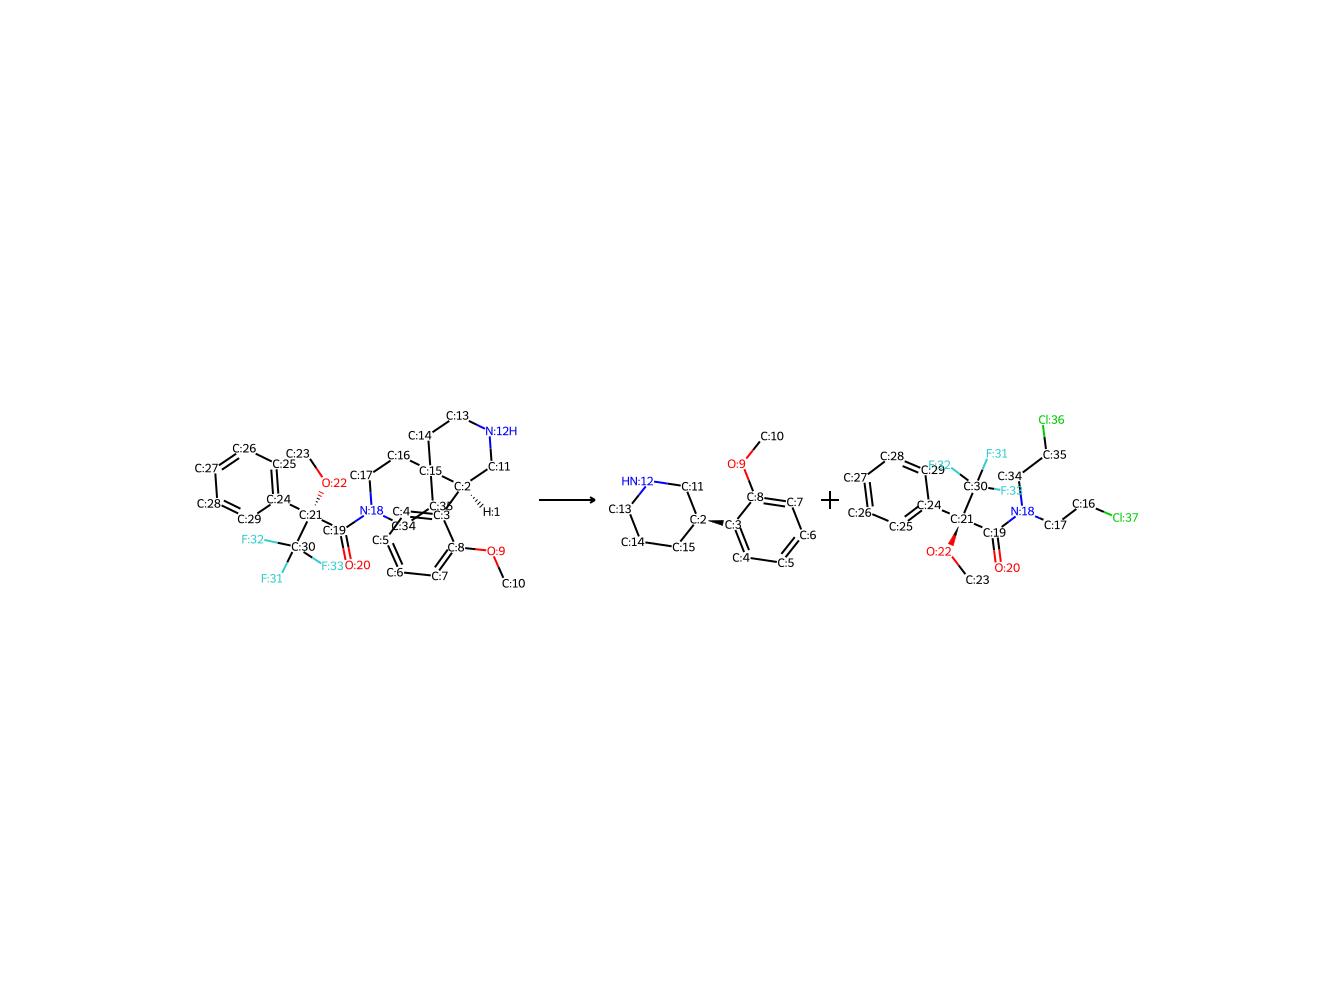

In [2]:
from rxnutils.chem.reaction import ChemicalReaction
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.AllChem import ReactionFromSmarts
from rdkit.Chem.rdChemReactions import HasReactionSubstructMatch
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd
IPythonConsole.ipython_useSVG = True
IPythonConsole.molSize = (1000, 1000)

reaction = "[H:1][C@@:2]1([c:3]2[cH:4][cH:5][cH:6][cH:7][c:8]2[O:9][CH3:10])[CH2:11][NH:12][CH2:13][CH2:14][C:15]12[CH2:16][CH2:17][N:18]([C:19](=[O:20])[C@:21]([O:22][CH3:23])([c:24]1[cH:25][cH:26][cH:27][cH:28][cH:29]1)[C:30]([F:31])([F:32])[F:33])[CH2:34][CH2:35]2>>[C@@H:2]1([c:3]2[cH:4][cH:5][cH:6][cH:7][c:8]2[O:9][CH3:10])[CH2:11][NH:12][CH2:13][CH2:14][CH2:15]1.[CH2:16]([CH2:17][N:18]([C:19](=[O:20])[C@:21]([O:22][CH3:23])([c:24]1[cH:25][cH:26][cH:27][cH:28][cH:29]1)[C:30]([F:31])([F:32])[F:33])[CH2:34][CH2:35][Cl:36])[Cl:37]"
rxn = ChemicalReaction(reaction)
display(ReactionFromSmarts(reaction, useSmiles=True))


Problematic Transformations:

In [1]:
#molecule 1 solved without problems
#molecule 2 has problems disconnecting chiral parts of the molecule
#molecule 3 "Template doesn't take into account activated methylene group"
retro_smarts_1 = "[C;H0;D4;+0:6]1-[CH2;D2;+0:1]-[CH2;D2;+0:2]-[N;H0;D3;+0:3]-[CH2;D2;+0:4]-[CH2;D2;+0:5]-1>>Cl-[CH2;D2;+0:1]-[CH2;D2;+0:2]-[N;H0;D3;+0:3]-[CH2;D2;+0:4]-[CH2;D2;+0:5]-Cl.[CH2;D2;+0:6]"
rxn1 = "[H:1][C@@:2]1([c:3]2[cH:4][cH:5][cH:6][cH:7][c:8]2[O:9][CH3:10])[CH2:11][NH:12][CH2:13][CH2:14][C:15]12[CH2:16][CH2:17][N:18]([C:19](=[O:20])[C@:21]([O:22][CH3:23])([c:24]1[cH:25][cH:26][cH:27][cH:28][cH:29]1)[C:30]([F:31])([F:32])[F:33])[CH2:34][CH2:35]2>>[C@@H:2]1([c:3]2[cH:4][cH:5][cH:6][cH:7][c:8]2[O:9][CH3:10])[CH2:11][NH:12][CH2:13][CH2:14][CH2:15]1.[CH2:16]([CH2:17][N:18]([C:19](=[O:20])[C@:21]([O:22][CH3:23])([c:24]1[cH:25][cH:26][cH:27][cH:28][cH:29]1)[C:30]([F:31])([F:32])[F:33])[CH2:34][CH2:35][Cl:36])[Cl:37]"
#molecule 4 incompatible reaction because Heck reaction needs a conjugated EWG group
retro_smarts_2 = "[C:4]=[CH;D2;+0:5]-[c;H0;D3;+0:1](:[c:2]):[c:3]>>Br-[c;H0;D3;+0:1](:[c:2]):[c:3].[C:4]=[CH2;D1;+0:5]"
rxn2 = "[NH:5]1[CH2:6][CH:7](/[CH:8]=[CH:9]/[c:10]2[cH:11][cH:12][c:13]([C:14]([F:15])([F:16])[F:17])[cH:18][cH:19]2)[CH2:20]1>>[NH:5]1[CH2:6][CH:7]([CH:8]=[CH2:9])[CH2:20]1.[c:10]1([Br:21])[cH:11][cH:12][c:13]([C:14]([F:15])([F:16])[F:17])[cH:18][cH:19]1"
#molecule 5. Unprotected aniline present in the molecule where secondary amine is used as reactant. Maybe not a problem.
#Still struggles with chirality and solving the whole route.
rxn3 = "[CH3:1][CH2:2][c:3]1[cH:4][c:5]([NH:6][C:7](=[O:8])[C:9](=[O:10])[N:11]2[CH2:12][C@@H:13]([CH3:14])[CH2:15][CH2:16][C@@H:17]2[c:18]2[cH:19][cH:20][c:21]3[s:22][c:23]([CH:24]4[CH2:25][CH2:26][N:27]([CH3:28])[CH2:29][CH2:30]4)[n:31][c:32]3[cH:33]2)[cH:34][n:35][c:36]1[NH2:37]>>[CH3:1][CH2:2][c:3]1[cH:4][c:5]([NH:6][C:7](=[O:8])[C:9](=[O:10])[OH:38])[cH:34][n:35][c:36]1[NH2:37].[NH:11]1[CH2:12][C@@H:13]([CH3:14])[CH2:15][CH2:16][C@@H:17]1[c:18]1[cH:19][cH:20][c:21]2[s:22][c:23]([CH:24]3[CH2:25][CH2:26][N:27]([CH3:28])[CH2:29][CH2:30]3)[n:31][c:32]2[cH:33]1"
retro_smarts_3 = "[C:4]-[N;H0;D3;+0:5](-[C:6])-[C;H0;D3;+0:1](-[C:2])=[O;D1;H0:3]>>O-[C;H0;D3;+0:1](-[C:2])=[O;D1;H0:3].[C:4]-[NH;D2;+0:5]-[C:6]"
### multistep problems ###
#Unproductive protection deprotection sequence.
rxn4 = "[NH:11]1[CH2:12][C@@H:13]([CH3:14])[CH2:15][CH2:16][C@@H:17]1[c:18]1[cH:19][cH:20][c:21]2[s:22][c:23]([CH:24]3[CH2:25][CH2:26][N:27]([CH3:28])[CH2:29][CH2:30]3)[n:31][c:32]2[cH:33]1>>[C:23]([CH:24]1[CH2:25][CH2:26][N:27]([CH3:28])[CH2:29][CH2:30]1)([OH:34])=[O:35].[NH:11]1[CH2:12][C@@H:13]([CH3:14])[CH2:15][CH2:16][C@@H:17]1[c:18]1[cH:19][cH:20][c:21]([SH:22])[c:32]([NH2:31])[cH:33]1"
retro_smarts_4 = "[c;H0;D3;+0:3]1:[c;H0;D3;+0:4]:[s;H0;D2;+0:5]:[c;H0;D3;+0:1]:[n;H0;D2;+0:2]:1>>O-[C;H0;D3;+0:1]=O.[NH2;D1;+0:2]-[c;H0;D3;+0:3]:[c;H0;D3;+0:4]-[SH;D1;+0:5]"
rxn5 = "[NH:11]1[CH2:12][C@@H:13]([CH3:14])[CH2:15][CH2:16][C@@H:17]1[c:18]1[cH:19][cH:20][c:21]([SH:22])[c:32]([NH2:31])[cH:33]1>>[N:11]1([CH2:34][c:35]2[cH:36][cH:37][cH:38][cH:39][cH:40]2)[CH2:12][C@@H:13]([CH3:14])[CH2:15][CH2:16][C@@H:17]1[c:18]1[cH:19][cH:20][c:21]([SH:22])[c:32]([NH2:31])[cH:33]1"
retro_smarts_5 = "[C:1]-[NH;D2;+0:2]-[C:3]-[c:4]1:[c:5]:[c:6]:[c:7]:[c:8]:[c:9]:1>>[C:1]-[N;H0;D3;+0:2](-C-c1:c:c:c:c:c:1)-[C:3]-[c:4]1:[c:5]:[c:6]:[c:7]:[c:8]:[c:9]:1"
rxn6 = "[N:11]1([CH2:34][c:35]2[cH:36][cH:37][cH:38][cH:39][cH:40]2)[CH2:12][C@@H:13]([CH3:14])[CH2:15][CH2:16][C@@H:17]1[c:18]1[cH:19][cH:20][c:21]([SH:22])[c:32]([NH2:31])[cH:33]1>>[N:11]1([CH2:34][c:35]2[cH:36][cH:37][cH:38][cH:39][cH:40]2)[CH2:12][C@@H:13]([CH3:14])[CH2:15][CH2:16][C@@H:17]1[c:18]1[cH:19][cH:20][c:21]([SH:22])[c:32]([N+:31](=[O:41])[O-:42])[cH:33]1"
retro_smarts_6 = "[NH2;D1;+0:1]-[c:2]>>O=[N+;H0;D3:1](-[O-])-[c:2]"
rxn7 = "[N:11]1([CH2:34][c:35]2[cH:36][cH:37][cH:38][cH:39][cH:40]2)[CH2:12][C@@H:13]([CH3:14])[CH2:15][CH2:16][C@@H:17]1[c:18]1[cH:19][cH:20][c:21]([SH:22])[c:32]([N+:31](=[O:41])[O-:42])[cH:33]1>>[CH:34]([c:35]1[cH:36][cH:37][cH:38][cH:39][cH:40]1)=[O:43].[NH:11]1[CH2:12][C@@H:13]([CH3:14])[CH2:15][CH2:16][C@@H:17]1[c:18]1[cH:19][cH:20][c:21]([SH:22])[c:32]([N+:31](=[O:41])[O-:42])[cH:33]1"
retro_smart_7 = "[C:3]-[N;H0;D3;+0:4](-[C:5]-[c:6]1:[c:7]:[c:8]:[c:9]:[c:10]:[c:11]:1)-[CH2;D2;+0:1]-[c:2]>>O=[CH;D2;+0:1]-[c:2].[C:3]-[NH;D2;+0:4]-[C:5]-[c:6]1:[c:7]:[c:8]:[c:9]:[c:10]:[c:11]:1"
rxn8 = "[NH:11]1[CH2:12][C@@H:13]([CH3:14])[CH2:15][CH2:16][C@@H:17]1[c:18]1[cH:19][cH:20][c:21]([SH:22])[c:32]([N+:31](=[O:41])[O-:42])[cH:33]1>>[N:11]1([C:43]([O:44][C:45]([CH3:46])([CH3:47])[CH3:48])=[O:49])[CH2:12][C@@H:13]([CH3:14])[CH2:15][CH2:16][C@@H:17]1[c:18]1[cH:19][cH:20][c:21]([SH:22])[c:32]([N+:31](=[O:41])[O-:42])[cH:33]1"
retro_smarts_8 = "[C:2]-[NH;D2;+0:1]-[C:3]-[c:4]1:[c:5]:[c:6]:[c:7]:[c:8]:[c:9]:1>>C-C(-C)(-C)-O-C(=O)-[N;H0;D3;+0:1](-[C:2])-[C:3]-[c:4]1:[c:5]:[c:6]:[c:7]:[c:8]:[c:9]:1"
#molecule 6. Potentially unstable beta-ketoester with OH in the side chain.
rxn9 = "[C:11]1(=[O:30])[C:12](=[C:13]([CH3:14])[OH:31])[NH:15][c:16]2[n:17][cH:18][c:19]3[c:20]([Cl:21])[n:22][n:23]([c:24]3[n:25]2)[CH2:26][CH2:27][CH2:28][O:29]1>>[C:11]([C:12](=[C:13]([CH3:14])[OH:31])[NH:15][c:16]1[n:17][cH:18][c:19]2[c:20]([Cl:21])[n:22][nH:23][c:24]2[n:25]1)([O:29][CH2:28][CH2:27][CH2:26][OH:32])=[O:30]"
retro_smarts_9 = "[#7;a:3]:[c:4]:[n;H0;D3;+0:5](:[#7;a:6])-[CH2;D2;+0:1]-[C:2]>>O-[CH2;D2;+0:1]-[C:2].[#7;a:3]:[c:4]:[nH;D2;+0:5]:[#7;a:6]"
#Another unstable beta-ketoester with OH in the side chain (just further diconnected from the previous one).
rxn10 = "[C:11]([C:12](=[C:13]([CH3:14])[OH:31])[NH:15][c:16]1[n:17][cH:18][c:19]2[c:20]([Cl:21])[n:22][nH:23][c:24]2[n:25]1)([O:29][CH2:28][CH2:27][CH2:26][OH:32])=[O:30]>>[C:11]([C:12](=[C:13]([CH3:14])[OH:31])[NH2:15])([O:29][CH2:28][CH2:27][CH2:26][OH:32])=[O:30].[c:16]1([Cl:33])[n:17][cH:18][c:19]2[c:20]([Cl:21])[n:22][nH:23][c:24]2[n:25]1" 
retro_smarts_10 = "[#7;a:2]:[c;H0;D3;+0:1](:[#7;a:3])-[NH;D2;+0:5]-[C:4]>>Cl-[c;H0;D3;+0:1](:[#7;a:2]):[#7;a:3].[C:4]-[NH2;D1;+0:5]"
#molecule 7. Give no disconnections, Daniel applied templates to the molecule and we filtered it with GED and Ring_Difference filters.
#molecule 8. First disconnection is not really clear from the mechanistic point of view.
rxn11 = "[O:1]=[S:2](=[O:3])([NH:4][C@H:5]1[CH2:6][CH2:7][N:8]([c:9]2[cH:10][cH:11][cH:12][cH:13][n:14]2)[CH2:15][C@H:16]1[CH2:17][O:18][C@H:19]1[CH2:20][CH2:21][C@@H:22]([c:23]2[cH:24][cH:25][cH:26][cH:27][cH:28]2)[CH2:29][CH2:30]1)[C:31]([F:32])([F:33])[F:34]>>[O:1]=[S:2](=[O:3])([NH:4][C@H:5]1[CH2:6][CH2:7][NH:8][CH2:15][C@H:16]1[CH2:17][O:18][C@H:19]1[CH2:20][CH2:21][C@@H:22]([c:23]2[cH:24][cH:25][cH:26][cH:27][cH:28]2)[CH2:29][CH2:30]1)[C:31]([F:32])([F:33])[F:34].[c:9]1([Cl:35])[cH:10][cH:36][c:37]([N+:38](=[O:39])[O-:40])[cH:41][n:14]1.[cH:11]1[cH:12][cH:13][cH:42][c:43]([N:44]2[CH2:45][C:46](=[O:47])[N:48]([CH2:49][c:50]3[cH:51][cH:52][cH:53][cH:54][cH:55]3)[CH2:56][CH2:57]2)[n:58]1"
retro_smarts_11 = "[C:7]-[N;H0;D3;+0:8](-[C:9])-[c;H0;D3;+0:1]1:[cH;D2;+0:2]:[cH;D2;+0:6]:[c:5]:[cH;D2;+0:4]:[n;H0;D2;+0:3]:1>>Cl-[c;H0;D3;+0:1]1:[cH;D2;+0:2]:c:c(-[N+](=O)-[O-]):c:[n;H0;D2;+0:3]:1.O=C1-C-N(-c2:c:[cH;D2;+0:4]:[c:5]:[cH;D2;+0:6]:n:2)-C-C-N-1-C-c1:c:c:c:c:c:1.[C:7]-[NH;D2;+0:8]-[C:9]"



In [52]:
rxn.generate_reaction_template(radius=0)
smarts = rxn.retro_template.smarts
print(smarts)

[CH2;D2;+0:2].[CH2;D2;+0:1].[CH2;D2;+0:3]>>[CH2;D2;+0:1]-[C;H0;D4;+0:2]-[CH2;D2;+0:3]


In [14]:
df = pd.read_csv("NPAtlas_download_2024_03.tsv", sep="\t")
pd.set_option('display.max_columns', None)
df.head()
# NPAtlas_smiles = df["compound_smiles"]

,npaid,compound_id,compound_names,compound_molecular_formula,compound_molecular_weight,compound_accurate_mass,compound_m_plus_h,compound_m_plus_na,compound_inchi,compound_inchikey,compound_smiles,compound_cluster_id,compound_node_id,origin_type,genus,origin_species,original_reference_author_list,original_reference_year,original_reference_issue,original_reference_volume,original_reference_pages,original_reference_doi,original_reference_pmid,original_reference_title,original_reference_type,original_journal_title,reassignment_dois,synthesis_dois,mibig_ids,gnps_ids,npmrd_id,npatlas_url
0,NPA000001,1,Curvularide C,C19H37NO5,359.507,359.2672,360.2745,382.2564,InChI=1S/C19H37NO5/c1-7-13(3)16(12-21)20-17(23...,BZLIDAVUQDTJQF-HWTFSWDCSA-N,CC[C@H](C)[C@@H](CO)NC(=O)/C=C/[C@](C)([C@H]([...,1,1,Fungus,Curvularia,geniculata,"Chomcheon, Porntep; Wiyakrutta, Suthep; Aree, ...",2010,36,16,11178-11185,10.1002/chem.201000652,20680940.0,Curvularides A-E: antifungal hybrid peptide-po...,article,Chemistry - A European Journal,[],[],[],[],NP0009379,https://www.npatlas.org/explore/compounds/NPA0...
1,NPA000002,2,Homopetasinic acid,C24H32O6,416.514,416.2199,417.2272,439.2091,InChI=1S/C24H32O6/c1-14(2)18-13-24(5)16(4)21(1...,MMWCHIIGAIJQMV-DHCANEKFSA-N,C[C@H]1[C@@H](CCC2=CC(=O)[C@@H](C[C@]12C)C(=C)...,2,2,Fungus,Diaporthe,sp. strain 1308-05,"Ito, Atsushi; Kumagai, Ikuya; Maruyama, Miku; ...",2016,10,57,1117-1119,10.1016/j.tetlet.2016.01.095,NaN,Homopetasinic acid isolated from Diaporthe sp....,article,Tetrahedron Letters,[],[],[],[],NP0250242,https://www.npatlas.org/explore/compounds/NPA0...
2,NPA000003,3,A-503083 F,C18H22N4O13,502.389,502.1183,503.1256,525.1075,InChI=1S/C18H22N4O13/c1-31-9-10(11(13(19)26)34...,RNRCUOCMUNIOMZ-UHFFFAOYSA-N,COC1C(C(OC1C(C(=O)N)OC2C(C(C=C(O2)C(=O)O)O)O)N...,3,3,Bacterium,Streptomyces,sp. SANK 62799,"Muramatsu, Yasunori; Ohnuki, Takashi; Ishii, M...",2004,10,57,639-646,10.7164/antibiotics.57.639,15638324.0,"A-503083 A, B, E and F, novel inhibitors of ba...",article,Journal of Antibiotics,[],[],['BGC0000288'],[],NP0005648,https://www.npatlas.org/explore/compounds/NPA0...
3,NPA000004,4,Aqabamycin E2,C16H11N3O5,325.280,325.0699,326.0772,348.0591,InChI=1S/C16H11N3O5/c20-12-7-6-10(8-11(12)19(2...,NMMDNCZQLOFGES-UHFFFAOYSA-N,C1=CC=C(C=C1)C2=C(NC(=C2C3=CC(=C(C=C3)O)[N+](=...,4,4,Bacterium,Vibrio,sp.,"Al-Zereini, Wael; Yao, Clarisse Blanchine Fots...",2010,6,63,297-301,10.1038/ja.2010.34,20431617.0,Aqabamycins A-G: novel nitro maleimides from a...,article,Journal of Antibiotics,[],[],[],[],NP0009185,https://www.npatlas.org/explore/compounds/NPA0...
4,NPA000005,5,Hymenopsin A,C22H32O6,392.492,392.2199,393.2272,415.2091,InChI=1S/C22H32O6/c1-18(10-23)6-3-7-19(2)13-9-...,OYLVOLOSQHRPLK-WRXMSMRBSA-N,C[C@]1(CCC[C@]2([C@H]1CC=C3[C@@H]2C[C@]45C(O4)...,5,5,Fungus,Fusarium,verticillioides,"Schmidt, Lori E.; Deyrup, Stephen T.; Baltrusa...",2010,3,73,404-408,10.1021/np900613d,19928955.0,Hymenopsins A and B and a macrophorin analogue...,article,Journal of Natural Products,[],[],[],[],NP0008877,https://www.npatlas.org/explore/compounds/NPA0...


In [25]:
import pandas as pd
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem

def calculate_avg_tanimoto(df, smiles_file):
    # Load the molecules from the file
    with open(smiles_file, 'r') as f:
        smiles_8 = f.read().splitlines()
    molecules_8 = [Chem.MolFromSmiles(smi) for smi in smiles_8]

    # Calculate the fingerprints for each molecule
    fps_8 = [AllChem.GetMorganFingerprintAsBitVect(mol, 2) for mol in molecules_8]

    # Calculate the Tanimoto similarity and find the most similar molecule
    def avg_tanimoto(smiles):
        mol = Chem.MolFromSmiles(smiles)
        if mol is not None:
            fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2)
            similarities = [DataStructs.TanimotoSimilarity(fp, fp_8) for fp_8 in fps_8]
            most_similar_index = similarities.index(max(similarities))
            return sum(similarities) / len(similarities), smiles_8[most_similar_index]
        else:
            return None, None

    df['avg_tanimoto'], df['most_similar_competition_molecule'] = zip(*df['compound_smiles'].apply(avg_tanimoto))
    return df

In [26]:
df_with_similarities = calculate_avg_tanimoto(df, "competition_smiles.txt")

In [32]:
df_with_similarities.sort_values(by='avg_tanimoto', ascending=False).head(5)


,npaid,compound_id,compound_names,compound_molecular_formula,compound_molecular_weight,compound_accurate_mass,compound_m_plus_h,compound_m_plus_na,compound_inchi,compound_inchikey,compound_smiles,compound_cluster_id,compound_node_id,origin_type,genus,origin_species,original_reference_author_list,original_reference_year,original_reference_issue,original_reference_volume,original_reference_pages,original_reference_doi,original_reference_pmid,original_reference_title,original_reference_type,original_journal_title,reassignment_dois,synthesis_dois,mibig_ids,gnps_ids,npmrd_id,npatlas_url,avg_tanimoto,most_similar_competition_molecule
24446,NPA024637,24637,Aeruginosamide C,C37H47N5O5S,673.880,673.3298,674.3371,696.3190,"InChI=1S/C37H47N5O5S/c1-7-37(4,5)41-27(21-25-1...",JOGGBCLHHSIJBJ-MGUFQOSJSA-N,CC(C)[C@H](C1=NC=C(S1)C(=O)OC)NC(=O)[C@@H]2CCC...,7560,5177,Bacterium,Microcystis,aeruginosa PCC 9432,Leikoski N; Liu L; Jokela J; Wahlsten M; Gugge...,2013,8,20,1033-1043,10.1016/j.chembiol.2013.06.015,23911585.0,Genome mining expands the chemical diversity o...,article,Chemistry & Biology,[],[],['BGC0000483'],[],NP0011983,https://www.npatlas.org/explore/compounds/NPA0...,0.165178,CC(F)(F)C1=NC(OC2=CC=CC=C2)=C(C(N[C@@H](C3CC3)...
24445,NPA024636,24636,Aeruginosamide B,C32H38N4O4S,574.747,574.2614,575.2687,597.2506,"InChI=1S/C32H38N4O4S/c1-5-32(2,3)35-24(19-22-1...",JQFBTQXBHCKSHR-KLJDGLGGSA-N,CC(C)(C=C)N[C@@H](CC1=CC=CC=C1)C(=O)N[C@@H](CC...,7560,5177,Bacterium,Microcystis,aeruginosa PCC 9432,Leikoski N; Liu L; Jokela J; Wahlsten M; Gugge...,2013,8,20,1033-1043,10.1016/j.chembiol.2013.06.015,23911585.0,Genome mining expands the chemical diversity o...,article,Chemistry & Biology,[],[],['BGC0000483'],[],NP0011982,https://www.npatlas.org/explore/compounds/NPA0...,0.160479,CC(F)(F)C1=NC(OC2=CC=CC=C2)=C(C(N[C@@H](C3CC3)...
30833,NPA031027,31027,Aeruginosamide 671,C37H45N5O5S,671.864,671.3141,672.3214,694.3033,"InChI=1S/C37H45N5O5S/c1-5-37(2,3)40-27(22-25-1...",IIMKUAKIRYOISV-UHFFFAOYSA-N,C=CC(C)(C)NC(CC1=CC=CC=C1)C(=O)NC(CC1=CC=CC=C1...,7560,5177,Bacterium,Limnoraphis,sp. CCNP1324,"Cegłowska, Marta; Szubert, Karolia; Wieczerzak...",2020,9,18,446,10.3390/md18090446,32867236.0,Eighteen new aeruginosamide variants produced ...,article,Marine Drugs,[],[],[],[],NaN,https://www.npatlas.org/explore/compounds/NPA0...,0.158195,CC(F)(F)C1=NC(OC2=CC=CC=C2)=C(C(N[C@@H](C3CC3)...
21560,NPA021745,21745,Dipyrimicin A,C12H10N2O4,246.222,246.0641,247.0714,269.0533,InChI=1S/C12H10N2O4/c1-18-9-6-8(12(16)17)14-10...,BINGMYCHTNBDIO-UHFFFAOYSA-N,COC1=CC(=NC(=C1O)C2=CC=CC=N2)C(=O)O,6761,209,Bacterium,Amycolatopsis,sp. K16-0194,"Izuta, Shoko; Kosaka, Shohei; Kawai, Makoto; M...",2018,5,71,535-537,10.1038/s41429-018-0028-0,29463887.0,"Dipyrimicin A and B, microbial compounds isola...",article,Journal of Antibiotics,[],[],[],[],NP0017665,https://www.npatlas.org/explore/compounds/NPA0...,0.156203,[H][C@](CNCC1)(C2=CC=CC=C2OC)C31CCN(C([C@@](OC...
33844,NPA034038,34038,Aspergillspin C,C16H16N2O5,316.313,316.1059,317.1132,339.0951,InChI=1S/C16H16N2O5/c1-23-16(22)12-13(20)9-5-2...,BZPQOKFDUQLGIS-NSHDSACASA-N,COC(=O)C1=C(N2CCC[C@H](O)C2=O)NC2=CC=CC=C2C1=O,9813,6572,Fungus,Aspergillus,sp. SCSIO 41501,"Ma, Xuan; Liang, Xiao; Huang, Zhong-Hui; Qi, S...",2020,14,34,1992-2000,10.1080/14786419.2019.1569660,30761921.0,New alkaloids and isocoumarins from the marine...,article,Natural Product Research,[],[],[],[],NaN,https://www.npatlas.org/explore/compounds/NPA0...,0.151031,[H][C@](CNCC1)(C2=CC=CC=C2OC)C31CCN(C([C@@](OC...


In [33]:
top_10_per_competition_molecule = df_with_similarities.groupby('most_similar_competition_molecule').apply(lambda x: x.nlargest(10, 'avg_tanimoto'))

In [37]:
top_10_per_competition_molecule["compound_smiles"].to_csv("top_10_per_competition_molecule.txt", index=False, header=False, sep="\n")